In [1]:
#%%

import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import scanpy as sc
from sklearn.metrics import adjusted_rand_score

# Import Gaudi
from gaudi.tools.config import GaudiArgumentParser
from gaudi.core import GaudiObject

# Parse configuration settings
config_path = "config.json"
config = GaudiArgumentParser(config_path=config_path).parse_args(known_only=True)

# Read the AnnData object
adata = sc.read_h5ad(config.adata_path)

# Instantiate GaudiObject with configurations
gaudi_obj = GaudiObject(adata, config=config)


Processing...
INFO:root:Starting quality control and preprocessing of anndata...
INFO:root:#Cells before filtering: 4726
INFO:root:#Genes before filtering: 2000



No multilevel spatial graph found for sample sample_1, processing initial data...


INFO:root:#Cells after filtering: 4726
INFO:root:#Genes after filtering: 2000
INFO:root:Normalizing data...
INFO:root:Performing PCA...
INFO:root:Preprocessing completed.
INFO:root:anndata object X matrix is now log normalized
INFO:root:anndata object original counts and normalized counts are stored in adata.layers['counts'] and adata.layers['log_normalized'] respectively
INFO:root:Graph average degree: 20.94
INFO:root:Starting hdbscan clustering with configuration: {'min_samples': 10, 'min_cluster_size': 10, 'xi': 0.01, 'max_eps': 300}
INFO:root:Done with hdbscan clustering. Number of clusters found: 34
INFO:root:Average number of cells within each community: 139.00
INFO:root:Number of edges: 49472
INFO:root:Calculating adjacencies...
100%|██████████| 34/34 [00:00<00:00, 1372.96it/s]
Done!


In [2]:
# Generate representations
gaudi_obj.generate_representations(
    train=config.train,
    epochs=config.epochs,
    device=config.device,
    hidden_dim=config.hidden_dim,
    output_dim=config.output_dim,
)

# Generate labels at different levels
gaudi_obj.generate_labels(level=0, clustering_method='kmeans', n_clusters=5)
gaudi_obj.generate_labels(level=1, clustering_method='kmeans', n_clusters=5)


  0%|          | 1/500 [00:00<03:02,  2.73it/s]

Loss: 6.5830


  3%|▎         | 13/500 [00:01<00:48, 10.12it/s]

Loss: 4.9218


  4%|▍         | 21/500 [00:02<00:46, 10.41it/s]

Loss: 3.2041


  7%|▋         | 33/500 [00:03<00:43, 10.66it/s]

Loss: 2.4029


  9%|▊         | 43/500 [00:04<00:42, 10.72it/s]

Loss: 1.9943


 11%|█         | 53/500 [00:05<00:41, 10.66it/s]

Loss: 1.9034


 13%|█▎        | 63/500 [00:06<00:41, 10.65it/s]

Loss: 1.7932


 15%|█▍        | 73/500 [00:07<00:40, 10.50it/s]

Loss: 1.6537


 17%|█▋        | 83/500 [00:08<00:38, 10.73it/s]

Loss: 1.5167


 19%|█▊        | 93/500 [00:08<00:37, 10.82it/s]

Loss: 1.4797


 21%|██        | 103/500 [00:09<00:36, 10.81it/s]

Loss: 1.4613


 23%|██▎       | 113/500 [00:10<00:35, 10.80it/s]

Loss: 1.4357


 25%|██▍       | 123/500 [00:11<00:35, 10.56it/s]

Loss: 1.3674


 27%|██▋       | 133/500 [00:12<00:34, 10.78it/s]

Loss: 1.4147


 29%|██▊       | 143/500 [00:13<00:32, 10.91it/s]

Loss: 1.3427


 31%|███       | 153/500 [00:14<00:31, 11.05it/s]

Loss: 1.3477


 33%|███▎      | 163/500 [00:15<00:30, 10.95it/s]

Loss: 1.3445


 35%|███▍      | 173/500 [00:16<00:29, 10.91it/s]

Loss: 1.3840


 37%|███▋      | 183/500 [00:17<00:28, 10.95it/s]

Loss: 1.3418


 39%|███▊      | 193/500 [00:18<00:27, 10.99it/s]

Loss: 1.4072


 41%|████      | 203/500 [00:19<00:26, 11.09it/s]

Loss: 1.3760


 43%|████▎     | 213/500 [00:19<00:25, 11.12it/s]

Loss: 1.3568


 45%|████▍     | 223/500 [00:20<00:24, 11.09it/s]

Loss: 1.3784


 47%|████▋     | 233/500 [00:21<00:24, 11.09it/s]

Loss: 1.3587


 49%|████▊     | 243/500 [00:22<00:23, 11.10it/s]

Loss: 1.3407


 51%|█████     | 253/500 [00:23<00:22, 11.06it/s]

Loss: 1.3620


 53%|█████▎    | 263/500 [00:24<00:21, 11.08it/s]

Loss: 1.4398


 55%|█████▍    | 273/500 [00:25<00:20, 11.10it/s]

Loss: 1.3577


 57%|█████▋    | 283/500 [00:26<00:19, 11.00it/s]

Loss: 1.3670


 59%|█████▊    | 293/500 [00:27<00:18, 11.12it/s]

Loss: 1.3623


 61%|██████    | 303/500 [00:28<00:17, 11.16it/s]

Loss: 1.3748


 63%|██████▎   | 313/500 [00:28<00:16, 11.23it/s]

Loss: 1.3483


 65%|██████▍   | 323/500 [00:29<00:15, 11.09it/s]

Loss: 1.3576


 67%|██████▋   | 333/500 [00:30<00:15, 11.10it/s]

Loss: 1.3498


 69%|██████▊   | 343/500 [00:31<00:14, 11.20it/s]

Loss: 1.5604


 71%|███████   | 353/500 [00:32<00:13, 11.21it/s]

Loss: 1.3681


 73%|███████▎  | 363/500 [00:33<00:12, 11.14it/s]

Loss: 1.3837


 75%|███████▍  | 373/500 [00:34<00:11, 11.07it/s]

Loss: 1.3656


 77%|███████▋  | 383/500 [00:35<00:10, 11.01it/s]

Loss: 1.3603


 79%|███████▊  | 393/500 [00:36<00:09, 11.14it/s]

Loss: 1.3472


 81%|████████  | 403/500 [00:37<00:08, 11.19it/s]

Loss: 1.3751


 83%|████████▎ | 413/500 [00:37<00:07, 11.17it/s]

Loss: 1.3743


 85%|████████▍ | 423/500 [00:38<00:06, 11.20it/s]

Loss: 1.3740


 87%|████████▋ | 433/500 [00:39<00:05, 11.28it/s]

Loss: 1.3800


 89%|████████▊ | 443/500 [00:40<00:05, 11.28it/s]

Loss: 1.4030


 91%|█████████ | 453/500 [00:41<00:04, 11.20it/s]

Loss: 1.3857


 93%|█████████▎| 463/500 [00:42<00:03, 11.29it/s]

Loss: 1.3643


 95%|█████████▍| 473/500 [00:43<00:02, 11.15it/s]

Loss: 1.3900


 97%|█████████▋| 483/500 [00:44<00:01, 11.09it/s]

Loss: 1.3550


 99%|█████████▊| 493/500 [00:45<00:00, 11.08it/s]

Loss: 1.3336


100%|██████████| 500/500 [00:45<00:00, 10.93it/s]


## Ground Truth - Cell Type Visualization

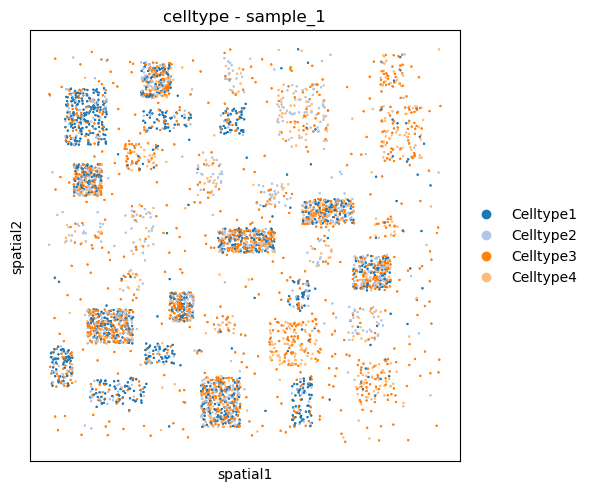

In [3]:
gaudi_obj.plot_dots(level=0, color_by='celltype', invert_yaxis=False, size=1.5, format='pdf')


## Ground Truth - Regions Visualization

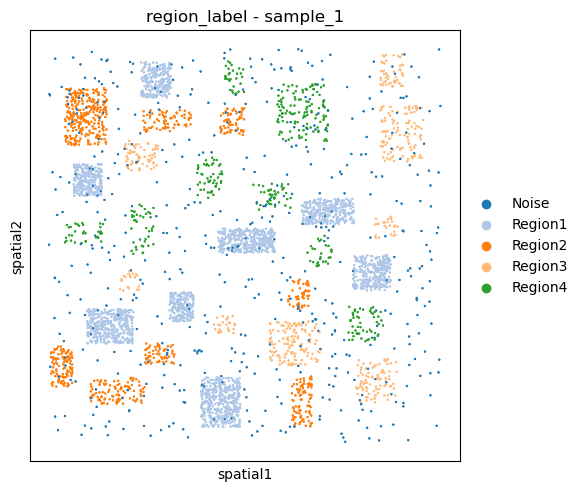

In [4]:
gaudi_obj.plot_dots(level=0, color_by='region_label', invert_yaxis=False, size=1.5, format='pdf')


## Gaudi's Community-Level Classification

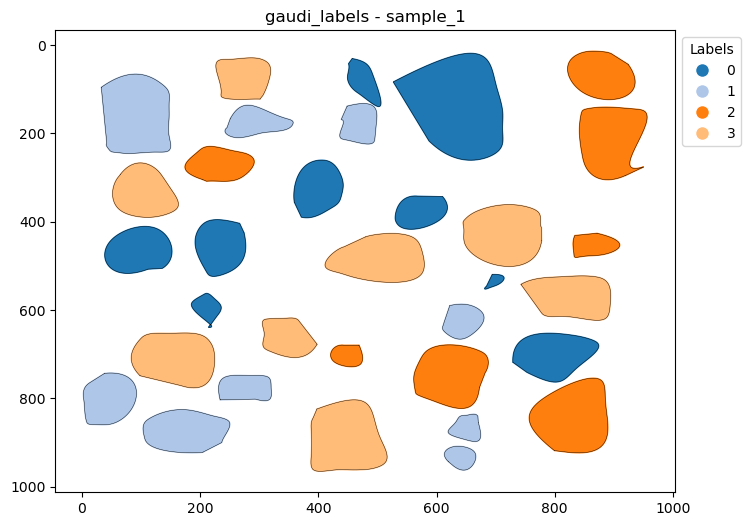

In [5]:
gaudi_obj.plot_communities(color_by='gaudi_labels', size=1, invert_yaxis=True)


In order to calculate later the Adjusted Rand Index (ARI), we use 'gaudi_labels_Projected_from_Community,' where we project the community-level classification onto the cell level, coloring each cell according to its corresponding community. Cells identified as noise during the community detection stage are grouped into a single large community. Although this community is considered in label generation, it is not visualized.

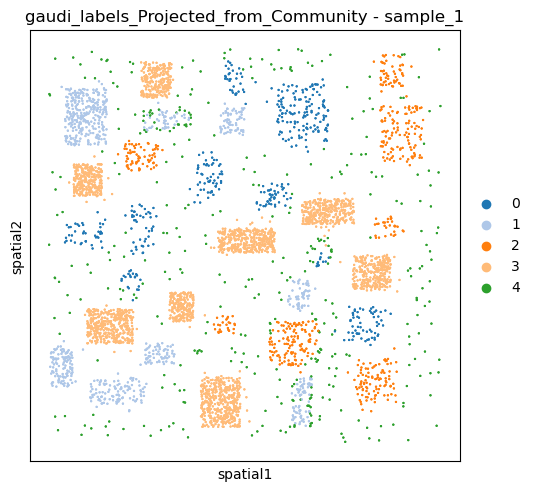

In [6]:
gaudi_obj.plot_dots(level=0, color_by='gaudi_labels_Projected_from_Community', invert_yaxis=False, size=1.5, format='pdf')


## Gaudi's Cell-Level Domain Detection

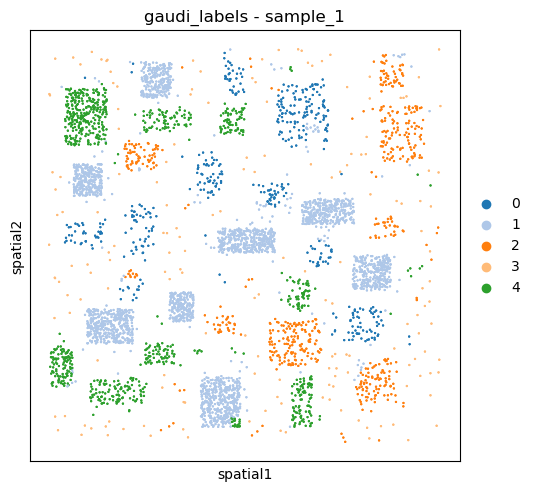

In [7]:
gaudi_obj.plot_dots(level=0, color_by='gaudi_labels', invert_yaxis=False, size=1.5, format='pdf')

## Performance
Calculating and saving the ARI based on the ground truth.

In [8]:
ground_truth = gaudi_obj.sample.base_adata.obs['region_label'].values
ari_level_0 = adjusted_rand_score(ground_truth, gaudi_obj.sample.labels[0]['gaudi_labels'])
ari_level_1 = adjusted_rand_score(ground_truth, gaudi_obj.sample.labels[0]['gaudi_labels_Projected_from_Community'])
print(f"Adjusted Rand Index of level 0: {ari_level_0}")
print(f"Adjusted Rand Index of level 1: {ari_level_1}")

# Save ARI scores to a CSV file
csv_path = os.path.join(os.getcwd(), 'ari_results_gaudi_mean_exp.csv')
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    df = pd.DataFrame(columns=['ID', 'ARI_level_0', 'ARI_level_1'])

new_row = pd.DataFrame([{'ID': config.sample_name, 'ARI_level_0': ari_level_0, 'ARI_level_1': ari_level_1}])
df = pd.concat([df, new_row], ignore_index=True)
df.to_csv(csv_path, index=False)

Adjusted Rand Index of level 0: 0.8513655831378509
Adjusted Rand Index of level 1: 0.9051021087291423
